In [1]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
# Question 1 - Linear Regression : 

df = pd.read_csv('heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


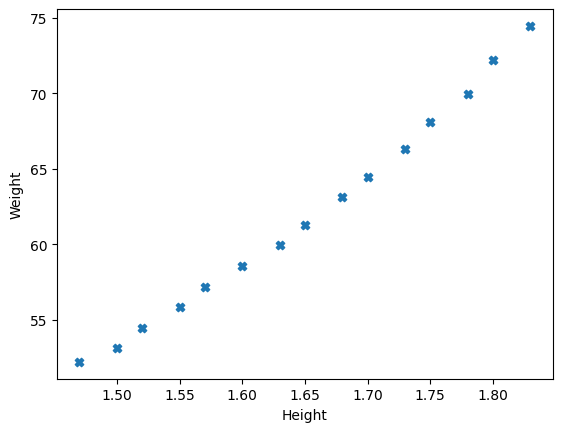

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [5]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


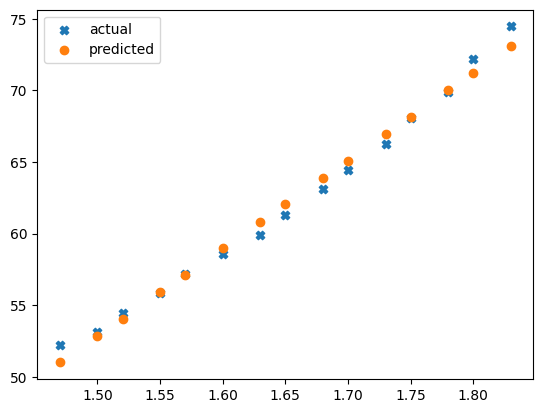

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

In [10]:
# Mutiple Linear Regression : 

df = pd.read_csv('advertise.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

In [12]:
scaler = preprocessing.MinMaxScaler()         # to normalize.

In [13]:
X = scaler.fit_transform(X)          # or X = preprocessing.minmax_scaler(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


In [17]:
# Closed Form Solution : I didn't find any direct library or module for it.
# So same solution as assignment 2 part A.

In [18]:
# Question 2 - Logistic Regression :

df = pd.read_csv('heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [19]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype(int))
X_train = X_train.reshape(-1, 1)    # reshaping into column.

In [20]:
scaler = preprocessing.StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)       # without standardizing it was giving all ones as predicted output.

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_train)
print("Train Accuracy: {}".format(accuracy_score(y_pred, y_train)))

Train Accuracy: 1.0


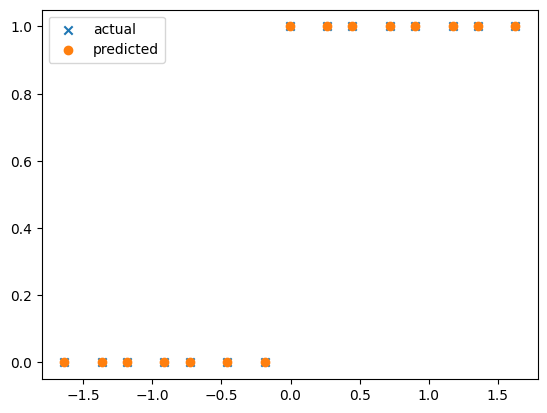

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

In [26]:
# Newton Raphson Method : Again did not find any direct library so same as Assignment 2 - A.

In [27]:
# K-Means Clustering :

# Define the parameters of the three Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])

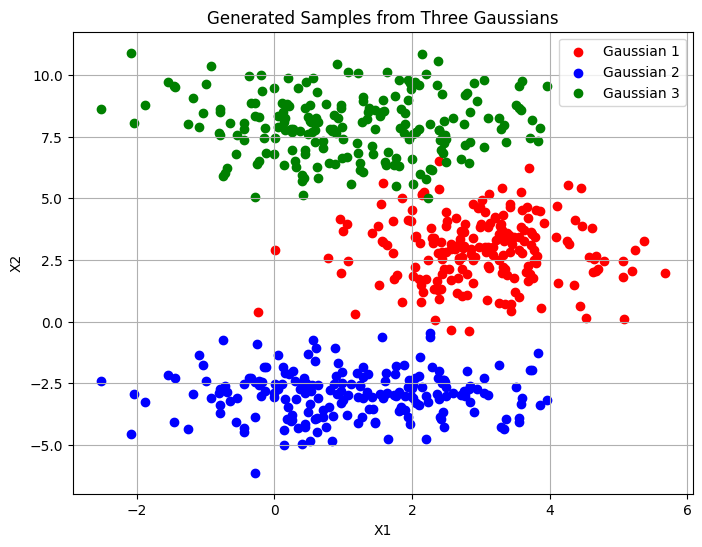

In [28]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Three Gaussians')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
data = np.vstack((samples1, samples2, samples3))   # combining into single dataset.

d:\Python 3.11.6\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


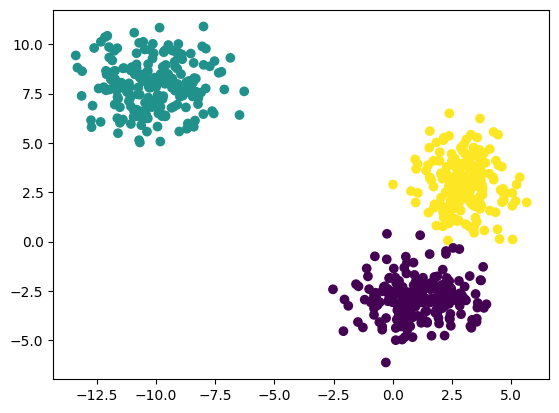

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.show()